Epoch 1/50
130/130 [==============================] - 2s 8ms/step - loss: 8.1052 - mae: 2.2329 - val_loss: 2.3132 - val_mae: 1.0860
Epoch 2/50
130/130 [==============================] - 1s 5ms/step - loss: 1.6672 - mae: 1.0050 - val_loss: 1.6410 - val_mae: 0.9359
Epoch 3/50
130/130 [==============================] - 1s 7ms/step - loss: 1.2836 - mae: 0.8837 - val_loss: 1.3002 - val_mae: 0.8363
Epoch 4/50
130/130 [==============================] - 1s 5ms/step - loss: 1.0306 - mae: 0.7926 - val_loss: 1.0429 - val_mae: 0.7551
Epoch 5/50
130/130 [==============================] - 1s 5ms/step - loss: 0.8436 - mae: 0.7167 - val_loss: 0.8506 - val_mae: 0.6877
Epoch 6/50
130/130 [==============================] - 1s 6ms/step - loss: 0.7124 - mae: 0.6550 - val_loss: 0.7027 - val_mae: 0.6363
Epoch 7/50
130/130 [==============================] - 0s 4ms/step - loss: 0.6203 - mae: 0.6122 - val_loss: 0.6429 - val_mae: 0.6181
Epoch 8/50
130/130 [==============================] - 1s 4ms/step - loss: 0.

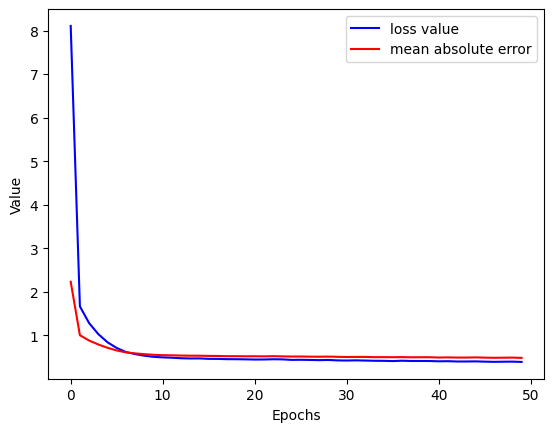

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 64)                768       
                                                                 
 dense_34 (Dense)            (None, 32)                2080      
                                                                 
 dense_35 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [26]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

# 1. 데이터 로드 및 전처리
df = pd.read_csv('wine.csv', sep=',')

# 특성과 타겟 분리
X = df.drop(['quality', 'color'], axis=1)
y = df['quality']

# 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# 3. 신경망 모델 구성
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# 4. 모델 학습
hist = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# 5. 모델 평가
eval_loss, eval_mae = model.evaluate(X_test, y_test)
print('와인 데이터의 평균 절대 오차 (MAE):', eval_mae)

# 6. 학습 결과 시각화
plt.plot(hist.history['loss'], 'b-', label='loss value')
plt.plot(hist.history['mae'], 'r-', label='mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

# 7. 모델 저장 및 불러오기
model.save('./wine_model.h5')
loaded_model = keras.models.load_model('./wine_model.h5')
loaded_model.summary()
